In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt


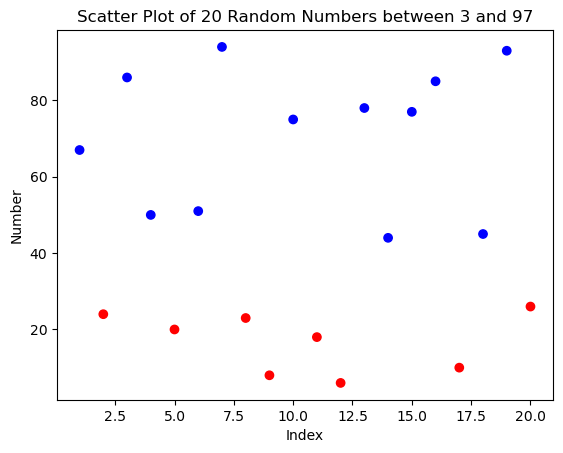

Numbers above 60: 8
Numbers below 40: 8


In [2]:


# Set a fixed seed for reproducibility
random.seed(4)

# Function to generate 5 numbers with the required distribution
def generate_group():
    group = []
    group.extend(random.sample(range(5, 40), 2))      # 2 numbers below 40
    group.extend(random.sample(range(61, 95), 2))     # 2 numbers above 60
    group.append(round(random.uniform(40, 60)))              # 1 number between 40 and 60
    random.shuffle(group)
    return group

# Generate 4 groups of 5 numbers each
numbers = []
for _ in range(4):
    numbers.extend(generate_group())


# Assign colors: red for numbers below 40, blue otherwise
colors = ['red' if number < 40 else 'blue' for number in numbers]

# Visualize the numbers as individual points on a scatter plot
plt.scatter(range(1, 21), numbers, color=colors)
plt.xlabel('Index')
plt.ylabel('Number')
plt.title('Scatter Plot of 20 Random Numbers between 3 and 97')
plt.show()

# Count numbers above 60 and below 40
above_60 = sum(1 for number in numbers if number > 60)
below_40 = sum(1 for number in numbers if number < 40)

print("Numbers above 60:", above_60)
print("Numbers below 40:", below_40)


In [3]:

# Create a DataFrame with an index and 'start_percentage' column
df = pd.DataFrame({
    'index': range(1, 21),
    'number': numbers,
    'angle': [(number/100*360) for number in numbers],
    # 'start_angle': [random.uniform(-180, 180 - number) for number in numbers]
})


df['start_angle'] = df.apply(
    lambda row: random.uniform(-175+ row['angle'], -5 ) if row['index'] % 2 else random.uniform(175 , 5 + row['angle']),
    axis=1
)


print(df)


    index  number  angle  start_angle
0       1      67  241.2    -1.053939
1       2      24   86.4   106.624991
2       3      86  309.6     3.067872
3       4      50  180.0   183.404627
4       5      20   72.0  -102.293289
5       6      51  183.6   178.970407
6       7      94  338.4    44.693671
7       8      23   82.8   147.814337
8       9       8   28.8   -38.152658
9      10      75  270.0   194.512517
10     11      18   64.8   -65.623491
11     12       6   21.6   132.230590
12     13      78  280.8    55.787939
13     14      44  158.4   172.294588
14     15      77  277.2    74.364968
15     16      85  306.0   283.445155
16     17      10   36.0  -128.135888
17     18      45  162.0   171.298642
18     19      93  334.8    -4.583383
19     20      26   93.6   135.358173


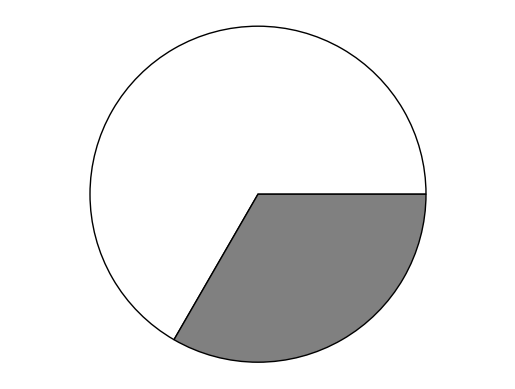

In [4]:
# Data to plot
sizes = [100, 50]
colors = ['white', 'gray']  # One white, one gray

# Plot
plt.pie(sizes, colors=colors, startangle=360, wedgeprops=dict(edgecolor='black'))

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


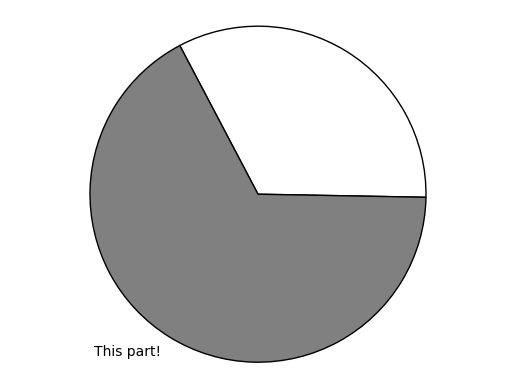

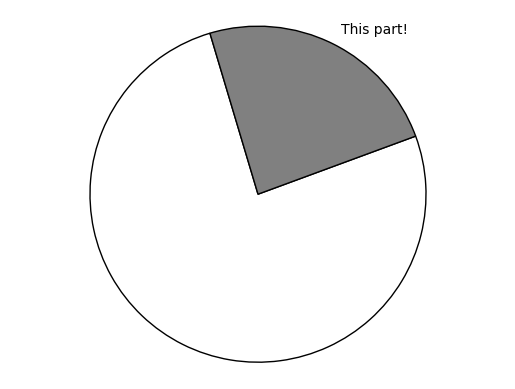

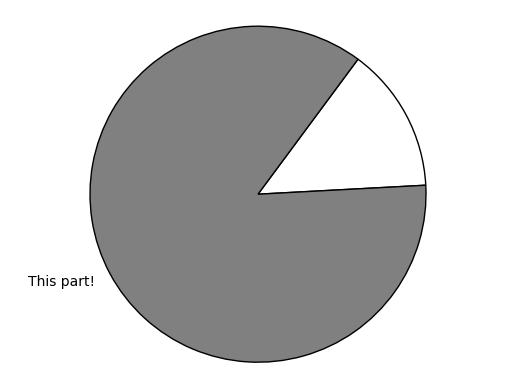

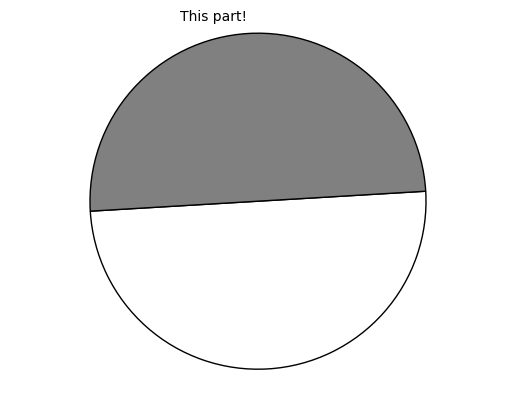

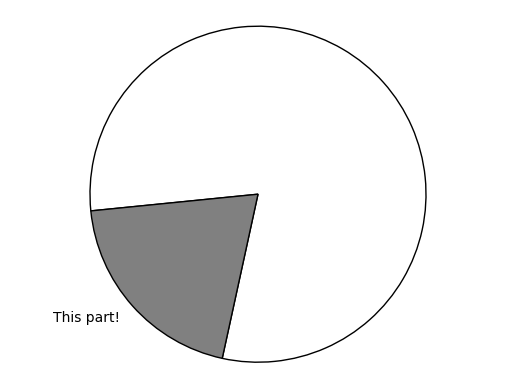

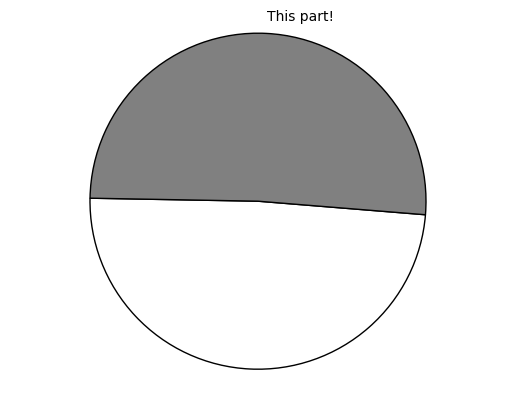

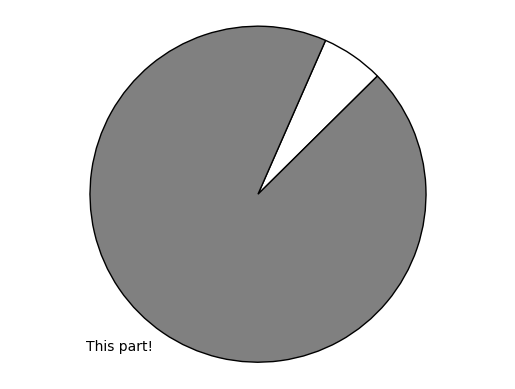

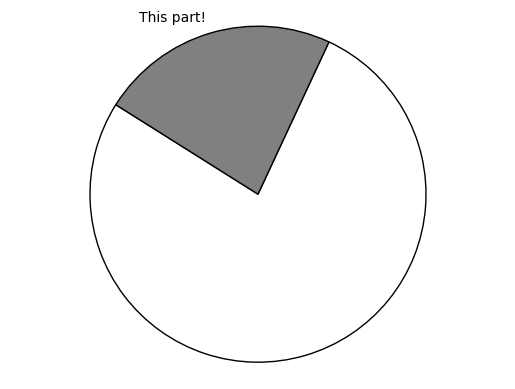

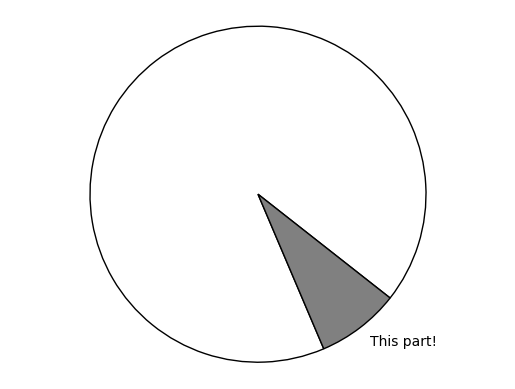

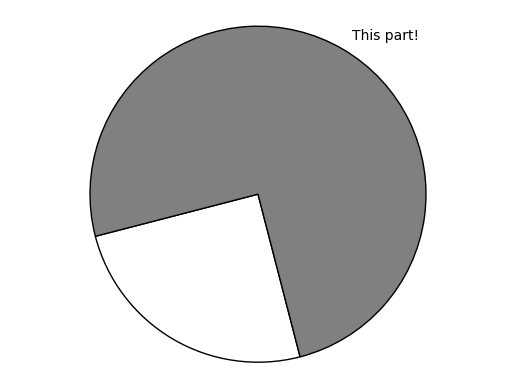

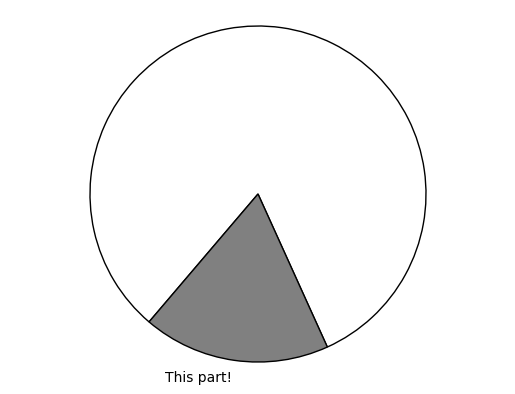

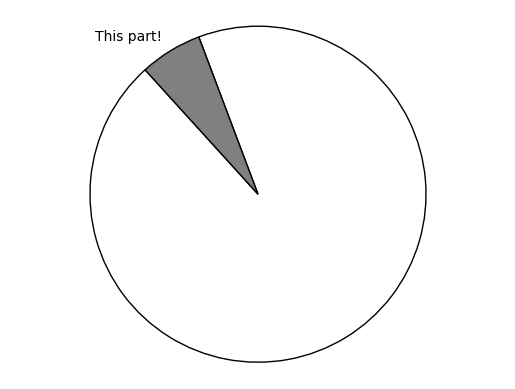

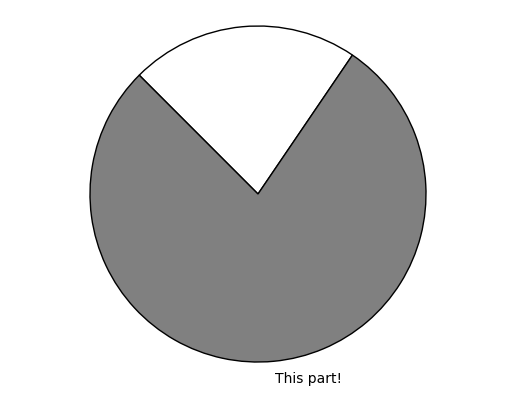

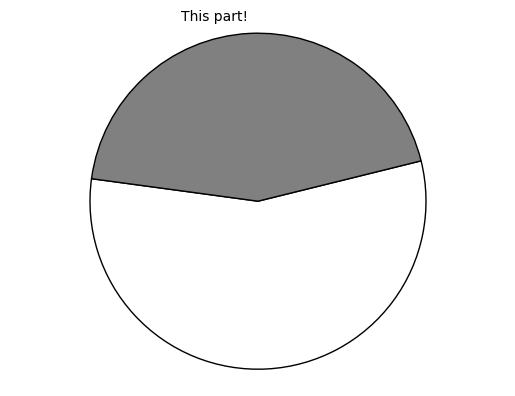

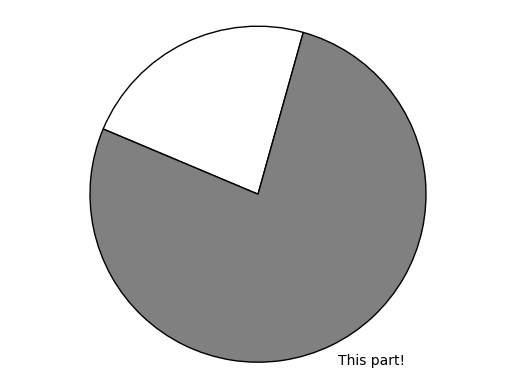

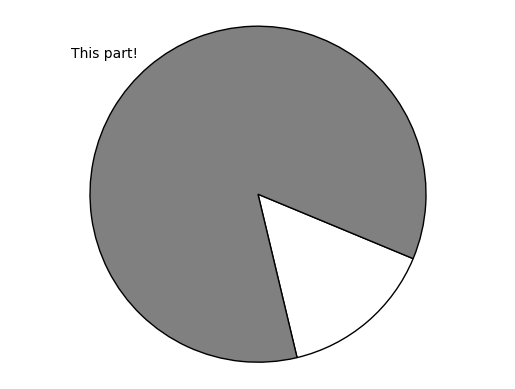

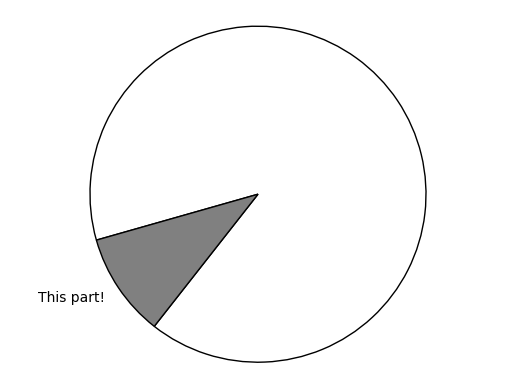

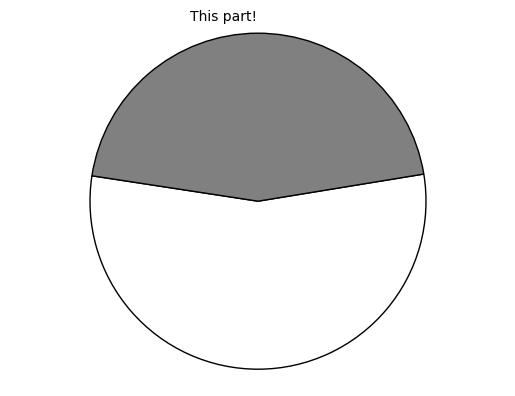

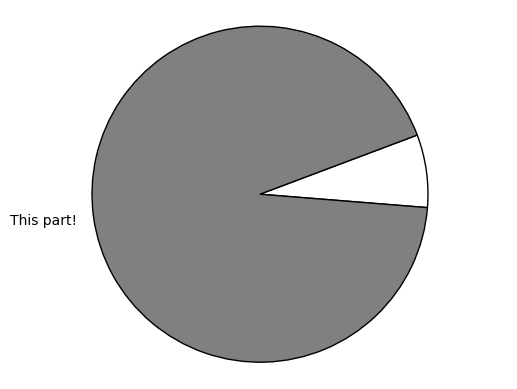

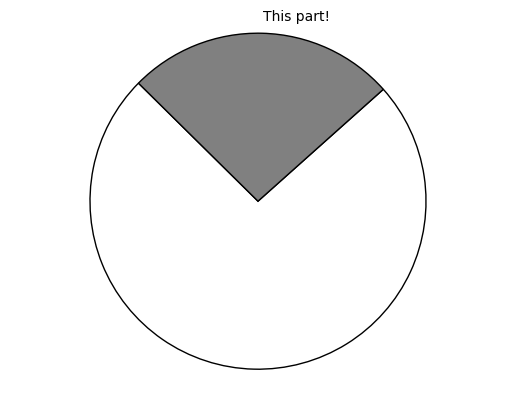

In [5]:

# Generate pie charts for each row in the DataFrame
for index, row in df.iterrows():
    sizes = [100 - row['number'], row['number']]
    colors = ['white', 'gray']
    start_angle = row['start_angle']
    
    plt.pie(sizes, colors=colors, startangle=start_angle, wedgeprops=dict(edgecolor='black'), labels=['', 'This part!'])
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    # plt.title(f"Index: {row['index']}, Number: {row['number']:.2f}, Start %: {row['start_angle']:.2f}")
    # plt.show()
    plt.savefig(f'charts/{index}.png')
    plt.show()



In [6]:
print(df)

    index  number  angle  start_angle
0       1      67  241.2    -1.053939
1       2      24   86.4   106.624991
2       3      86  309.6     3.067872
3       4      50  180.0   183.404627
4       5      20   72.0  -102.293289
5       6      51  183.6   178.970407
6       7      94  338.4    44.693671
7       8      23   82.8   147.814337
8       9       8   28.8   -38.152658
9      10      75  270.0   194.512517
10     11      18   64.8   -65.623491
11     12       6   21.6   132.230590
12     13      78  280.8    55.787939
13     14      44  158.4   172.294588
14     15      77  277.2    74.364968
15     16      85  306.0   283.445155
16     17      10   36.0  -128.135888
17     18      45  162.0   171.298642
18     19      93  334.8    -4.583383
19     20      26   93.6   135.358173


In [7]:

# Add 'size' column
df['size'] = np.where(df['number'] <= 40, 'small', np.where(df['number'] >= 60, 'big', 'NA'))

# Add 'Orientation' column
df['Orientation'] = np.where(
    (df['number'] <= 40) & (df['start_angle'] < 0), 'Bottom',
    np.where((df['number'] <= 40) & (df['start_angle'] > 0), 'Top', 'NA')
)

print(df)


    index  number  angle  start_angle   size Orientation
0       1      67  241.2    -1.053939    big          NA
1       2      24   86.4   106.624991  small         Top
2       3      86  309.6     3.067872    big          NA
3       4      50  180.0   183.404627     NA          NA
4       5      20   72.0  -102.293289  small      Bottom
5       6      51  183.6   178.970407     NA          NA
6       7      94  338.4    44.693671    big          NA
7       8      23   82.8   147.814337  small         Top
8       9       8   28.8   -38.152658  small      Bottom
9      10      75  270.0   194.512517    big          NA
10     11      18   64.8   -65.623491  small      Bottom
11     12       6   21.6   132.230590  small         Top
12     13      78  280.8    55.787939    big          NA
13     14      44  158.4   172.294588     NA          NA
14     15      77  277.2    74.364968    big          NA
15     16      85  306.0   283.445155    big          NA
16     17      10   36.0  -128.

In [11]:
df.to_csv('answers.csv')

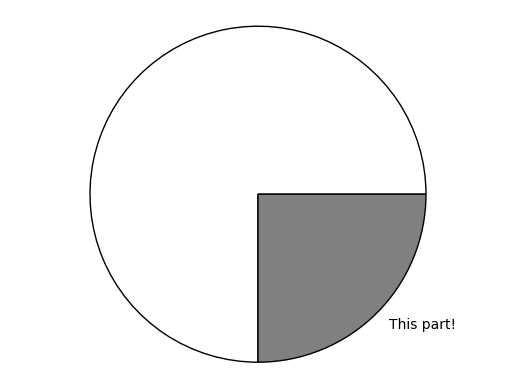

In [8]:
# Data to plot
sizes = [75, 25]
colors = ['white', 'gray']  # One white, one gray

plt.pie(sizes, colors=colors, startangle=0, wedgeprops=dict(edgecolor='black'), labels=['', 'This part!'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.title(f"Index: {row['index']}, Number: {row['number']:.2f}, Start %: {row['start_angle']:.2f}")
# plt.show()
plt.savefig(f'charts/example25.png')
plt.show()

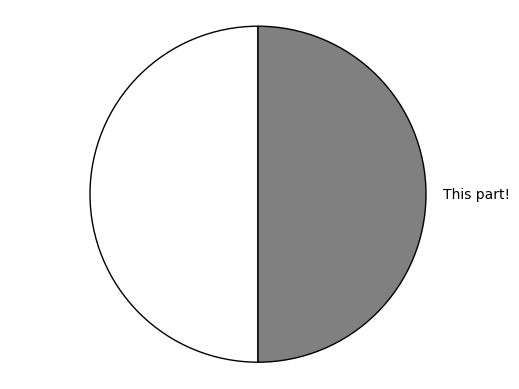

In [9]:
# Data to plot
sizes = [50, 50]
colors = ['white', 'gray']  # One white, one gray

plt.pie(sizes, colors=colors, startangle=90, wedgeprops=dict(edgecolor='black'), labels=['', 'This part!'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.title(f"Index: {row['index']}, Number: {row['number']:.2f}, Start %: {row['start_angle']:.2f}")
# plt.show()
plt.savefig(f'charts/example50.png')
plt.show()